In [1]:
#Import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os


In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
os.chdir("/content/drive/MyDrive/ANN")

In [51]:
# Check version of tensorflow and keras
print(f"Tensorflow Versionn{tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Versionn2.17.0
Keras Version 3.4.1


In [52]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [53]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [54]:
check_list = ['CPU', 'GPU']
for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out)>0:
    print(f"{device} is available")
    print(f"Details >> {out}")
  else:
    print(f"{device} is not available")



CPU is available
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is available
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [55]:
mnist = tf.keras.datasets.mnist


In [56]:
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [57]:
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

In [58]:
x_train_full.shape

(60000, 28, 28)

In [59]:
x_test.shape

(10000, 28, 28)

In [60]:
x_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [61]:
# Create a validation set from thee full training data
# Scale the data between 0 and 1 by dividing it by 255 as it is unsigned data between 0-255

x_valid, x_train = x_train_full[:5000]/255.0, x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]



# Scale the test set as well
x_test = x_test/255.0

In [62]:
len(x_train_full[5000:])

55000

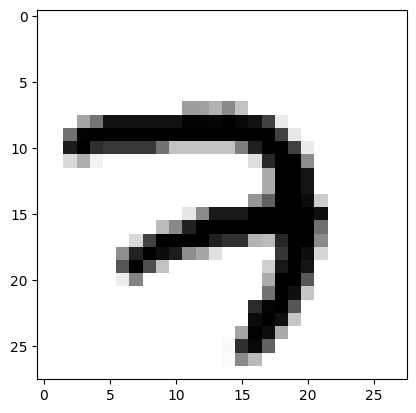

In [63]:
# Lets view some data

plt.imshow(x_train[0], cmap="binary")
plt.show()

<Axes: >

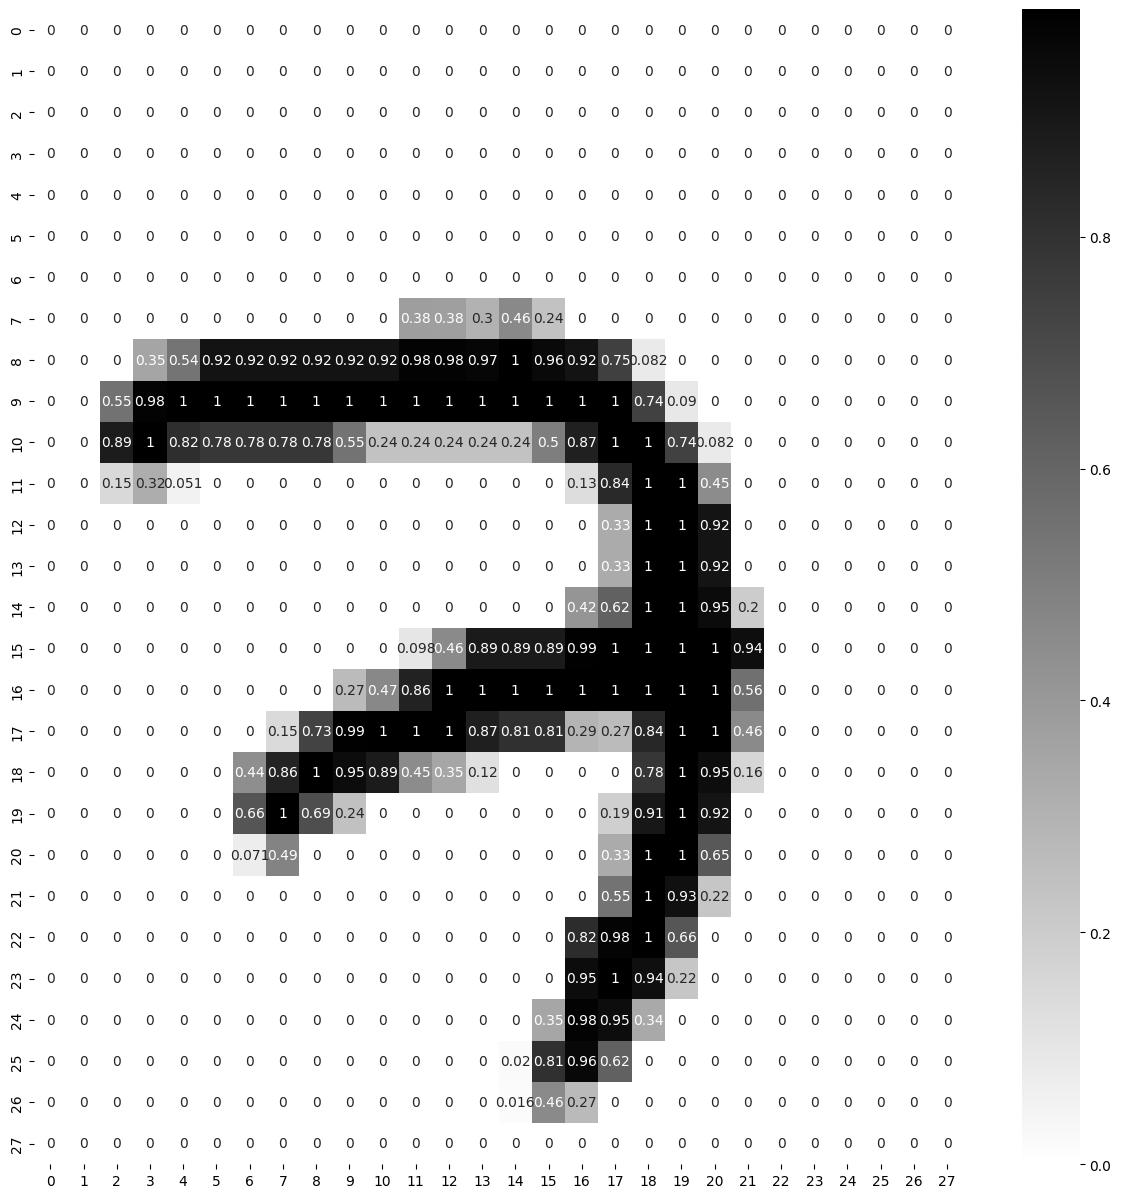

In [64]:
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], annot = True, cmap="binary")


In [65]:
# Possiblle outputs: 0,1,2,3,4,5,6,7,8,9
# This is multiclass classification problem.Therefore softmax can be used here.


In [66]:
28*28

784

In [67]:
# Method 1
# Creating Layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape = [28,28], name = "inputLayer"),
          tf.keras.layers.Dense(300, activation = "relu", name = "hiddenLayer1"),
          tf.keras.layers.Dense(100, activation = "relu", name = "hiddenLayer2"),
          tf.keras.layers.Dense(10, activation = "softmax", name = "outputLayer")
          ]


model_clf = tf.keras.models.Sequential(LAYERS)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
# Method 2
# from keras.models import Sequential
# from keras.layers import Dense, Flatten


# # Define the model
# model = sequential()
# model.add(Dense(units = 64, activation = 'relu', input_dim = 100))
# model.add(Dense(units = 10, activation = 'softmax'))

In [69]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [70]:
model_clf.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer1 (Dense)                 │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenLayer2 (Dense)                 │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# # Parameters
# hiddenLayer1 = 784*300 + 300
# hiddenLayer2 = 300*100 + 100
# outputLayer = 100*10 + 10
# total_params = hiddenLayer1 + hiddenLayer2 + outputLayer
# total_params

# this is what the above table tells aboutA

In [72]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [73]:
hidden1.get_weights()

[array([[-0.06493163,  0.05862808, -0.02275245, ...,  0.06775323,
         -0.0555695 , -0.00509883],
        [-0.02879952, -0.02968634, -0.01129901, ..., -0.01546061,
          0.05276868,  0.02748903],
        [-0.07013477,  0.06636761, -0.00848731, ...,  0.04866517,
          0.06294891,  0.04171111],
        ...,
        [-0.06276811,  0.03082543, -0.06836023, ...,  0.01883207,
         -0.02261725,  0.07106635],
        [ 0.04593228, -0.00041781,  0.04720625, ...,  0.02808192,
          0.05984975,  0.04483053],
        [ 0.0228164 ,  0.00373769,  0.06482691, ...,  0.06537093,
          0.0586976 , -0.01727708]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [74]:
weight, biases = hidden1.get_weights()
weight


array([[-0.06493163,  0.05862808, -0.02275245, ...,  0.06775323,
        -0.0555695 , -0.00509883],
       [-0.02879952, -0.02968634, -0.01129901, ..., -0.01546061,
         0.05276868,  0.02748903],
       [-0.07013477,  0.06636761, -0.00848731, ...,  0.04866517,
         0.06294891,  0.04171111],
       ...,
       [-0.06276811,  0.03082543, -0.06836023, ...,  0.01883207,
        -0.02261725,  0.07106635],
       [ 0.04593228, -0.00041781,  0.04720625, ...,  0.02808192,
         0.05984975,  0.04483053],
       [ 0.0228164 ,  0.00373769,  0.06482691, ...,  0.06537093,
         0.0586976 , -0.01727708]], dtype=float32)

In [75]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [76]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = 'SGD'
METRICS = ['accuracy']


model_clf.compile(loss = LOSS_FUNCTION,
                  optimizer = OPTIMIZER,
                  metrics = METRICS)

## Tensorflow callback functions

In [1]:
# Logging
import time


def get_log_path(log_dir = "logs/fit"):
  filename = time.strftime("log_at_%Y_%m_%d_%H_%M_%S")
  log_path = os.path.join(log_dir, filename)
  print(f"Saving logs at {log_path}")
  return log_path

  log_dir = get_log_path()
  tb_cb = tf.keras.callbacks.TensorBoard(log_dir = log_dir)

In [28]:
# Training
EPOCHS = 30
VALIDATION_SET = (x_valid, y_valid)

history = model_clf.fit(x_train, y_train, epochs=EPOCHS, validation_data= VALIDATION_SET, batch_size=32)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7303 - loss: 1.0063 - val_accuracy: 0.9166 - val_loss: 0.3086
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9131 - loss: 0.3056 - val_accuracy: 0.9286 - val_loss: 0.2580
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9302 - loss: 0.2498 - val_accuracy: 0.9420 - val_loss: 0.2132
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9405 - loss: 0.2050 - val_accuracy: 0.9506 - val_loss: 0.1873
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9456 - loss: 0.1880 - val_accuracy: 0.9566 - val_loss: 0.1635
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9531 - loss: 0.1603 - val_accuracy: 0.9592 - val_loss: 0.1526
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9594 - loss: 0.1407 - val_accuracy: 0.9632 - val_loss: 0.1360
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9657 - loss: 0.1236 -

In [29]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [30]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.842018,0.604051,0.9166,0.308572
1,0.917382,0.292019,0.9286,0.258036
2,0.930982,0.241461,0.9420,0.213240
3,0.941145,0.205908,0.9506,0.187328
4,0.948655,0.179274,0.9566,0.163500
5,0.954873,0.158116,0.9592,0.152604
6,0.959691,0.140620,0.9632,0.136020
7,0.964545,0.126569,0.9676,0.125229
8,0.967564,0.114712,0.9696,0.116029
9,0.970436,0.104588,0.9698,0.110297


<Axes: >

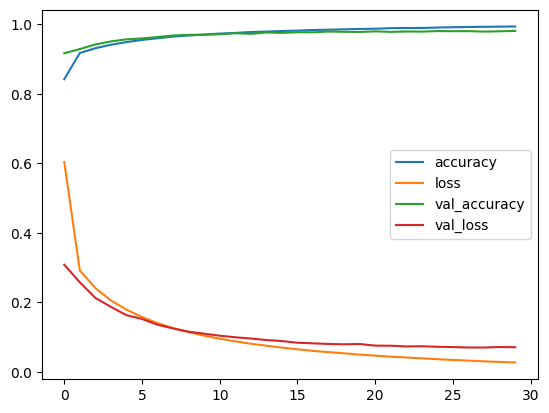

In [31]:
pd.DataFrame(history.history).plot()

In [32]:
model_clf.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9746 - loss: 0.0847


[0.07130180299282074, 0.9782000184059143]

In [33]:
x_new = x_test[:3]


In [34]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

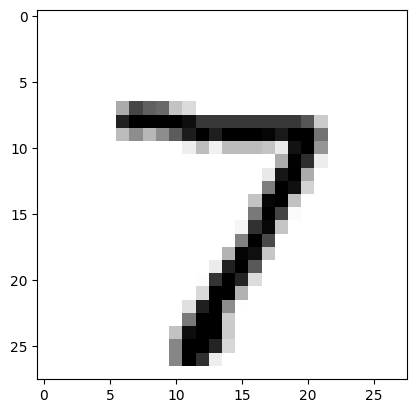

In [35]:
# Lets view some data

plt.imshow(x_test[0], cmap="binary")
plt.show()

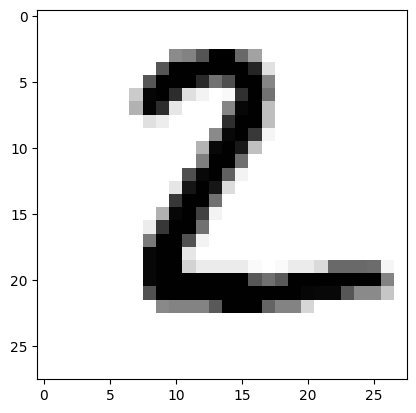

In [36]:
# Lets view some data

plt.imshow(x_test[1], cmap="binary")
plt.show()

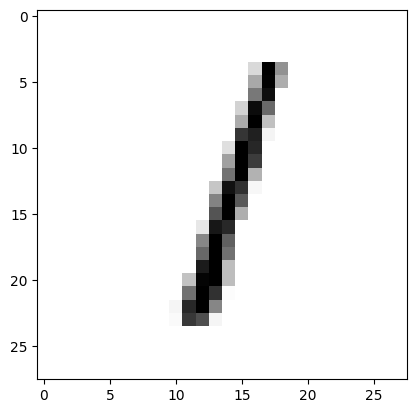

In [37]:
# Lets view some data

plt.imshow(x_test[2], cmap="binary")
plt.show()

In [38]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [39]:
y_prob

array([[5.74495698e-06, 8.79205516e-07, 2.61853638e-05, 6.82407874e-04,
        3.50667606e-09, 2.07114522e-06, 2.17198343e-11, 9.99264181e-01,
        3.95647976e-06, 1.45416261e-05],
       [8.37856291e-08, 2.22797044e-05, 9.99955654e-01, 1.97915579e-05,
        6.34182810e-12, 6.92091930e-08, 4.94873404e-08, 4.95241608e-12,
        2.00076079e-06, 5.39532916e-14],
       [8.10870517e-07, 9.97019947e-01, 2.57516745e-04, 1.25552315e-05,
        2.62750662e-04, 1.85443005e-05, 9.19718659e-05, 1.44997414e-03,
        8.82248161e-04, 3.48571029e-06]], dtype=float32)

In [40]:
y_pred = np.argmax(y_prob, axis = 1)

In [41]:
y_pred

array([7, 2, 1])

In [42]:
actual

array([7, 2, 1], dtype=uint8)

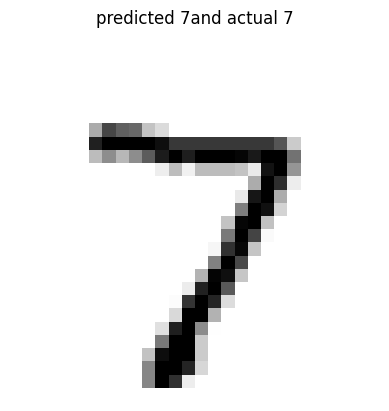

########################


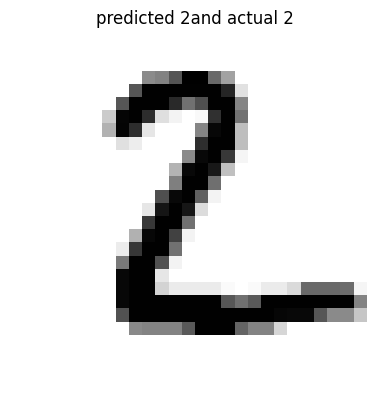

########################


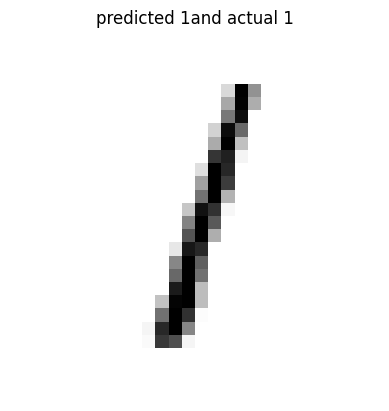

########################


In [43]:
for data, pred, actual_data in zip (x_new, y_pred, actual):
  plt.imshow(data, cmap = "binary")
  plt.title(f"predicted {pred}and actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("########################")